In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

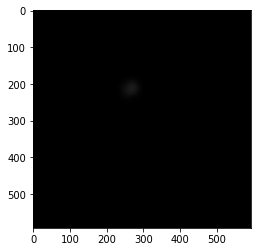

In [31]:
test='/home/zenalisa/data/output/00/prediction_models.tiff'
#test='/home/zenalisa/data/aia/1131/tiff/aia.lev1_euv_12s.2010-12-04T164726Z.304.image.tiff'
i=mpimg.imread(test)

plt.imshow(i)

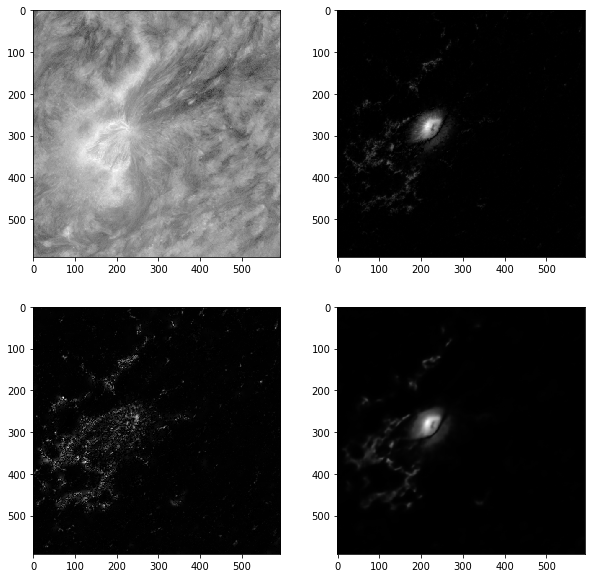

In [12]:
from PIL import Image

target='/home/zenalisa/data/output/full/23/target.tiff'
prediction='/home/zenalisa/data/output/full/23/prediction_models.tiff'

t = Image.open(target)
t = np.array(t)
plt.imshow(t, cmap='gray')

plt.figure()
p = Image.open(prediction)
p = np.array(p)
plt.imshow(p, cmap='gray')

plt.figure()
diff = abs(np.subtract(t, p))
plt.imshow(diff, cmap='gray')

In [194]:
from skimage.measure import compare_ssim, compare_nrmse
import glob

target_list = glob.glob('/home/zenalisa/data/output/full/*/target.tiff')
prediction_list = glob.glob('/home/zenalisa/data/output/full/*/prediction_models.tiff')
signal_list = glob.glob('/home/zenalisa/data/output/full/*/signal.tiff')

target_list.sort()
prediction_list.sort()
signal_list.sort()
#print target_list
#print signal_list
#print prediction_list
ssim = []
mse = []

for t in target_list:
    p = prediction_list[target_list.index(t)]
    t = np.array(Image.open(t))
    p = np.array(Image.open(p))
    ssim.append(compare_ssim(t, p)) 
    mse.append(compare_nrmse(t, p, 'min-max'))#is min- max the way to do this?? go look at ounkomol
    
print np.mean(ssim) #https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/
print np.mean(mse)



0.4111268825616394
0.030846392987386378


In [198]:
idx = (np.abs(ssim - np.mean(ssim))).argmin()
print idx
#ssim closest to mean
mean_ssim = ssim[idx]

2


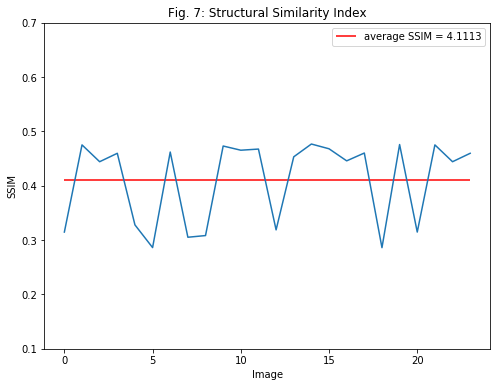

In [146]:
plt.figure(figsize = (8, 6))
plt.plot(ssim)
plt.hlines(np.mean(ssim), 0, 23, 'r', label='average SSIM = .41113')
plt.ylim((.1, .7))
plt.title('Fig. 7: Structural Similarity Index')
plt.ylabel('SSIM')
plt.xlabel('Image')
plt.legend()
plt.savefig('fig7')
plt.show()

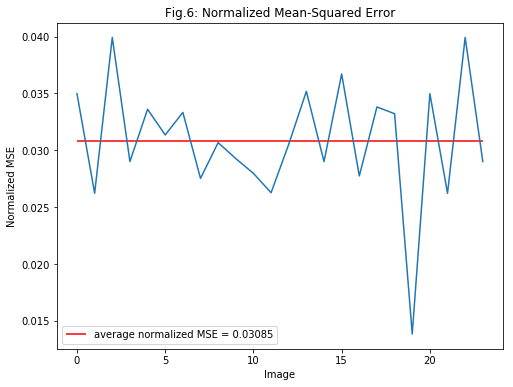

In [145]:
plt.figure(figsize = (8, 6))
plt.plot(mse)
plt.hlines(np.mean(mse), 0, 23, 'r', label='average normalized MSE = 0.03085')
#plt.ylim((.1, .7))
plt.ylabel('Normalized MSE')
plt.xlabel('Image')
plt.legend()
plt.title('Fig.6: Normalized Mean-Squared Error')
plt.savefig('fig6.png')
plt.show()
#plt.savefig('fig6.png')

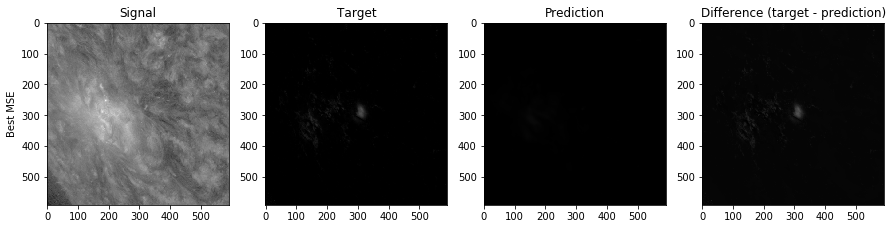

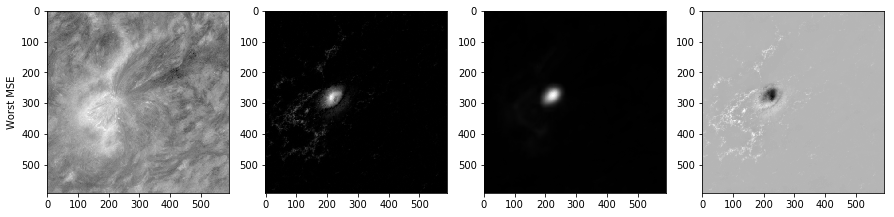

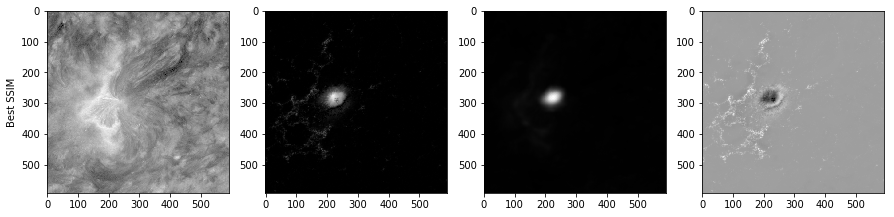

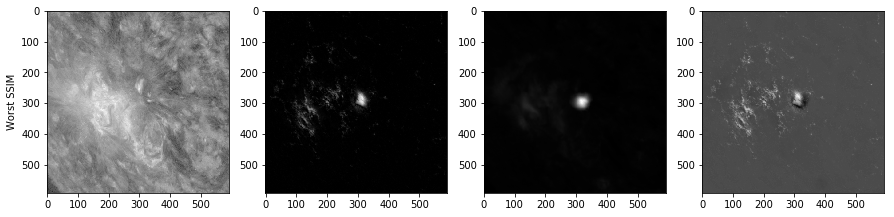

In [163]:
#"best" images
best_ssim = ssim.index(max(ssim))
best_mse =  mse.index(min(mse))

#"worst" images
worst_mse = mse.index(max(mse))
worst_ssim= ssim.index(min(ssim))

plt.figure(figsize=(15, 15))
t = np.array(Image.open(target_list[best_mse]))
p = np.array(Image.open(prediction_list[best_mse]))
s = np.array(Image.open(signal_list[best_mse]))


plt.subplot(1, 4, 1)
plt.title('Signal')
plt.ylabel('Best MSE')
plt.imshow(s, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('Target')
plt.imshow(t, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('Prediction')
plt.imshow(p, cmap='gray', vmin=t.min(), vmax = t.max())
plt.subplot(1, 4, 4)
plt.title('Difference (target - prediction)')
diff = np.subtract(t, p)
plt.imshow(diff, cmap='gray')
plt.savefig('fig81.png')


plt.figure(figsize=(15, 15))
t = np.array(Image.open(target_list[worst_mse]))
p = np.array(Image.open(prediction_list[worst_mse]))
s = np.array(Image.open(signal_list[worst_mse]))
plt.subplot(1, 4, 1)
plt.imshow(s, cmap='gray')
plt.ylabel('Worst MSE')
plt.subplot(1, 4, 2)
plt.imshow(t, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(p, cmap='gray')
plt.subplot(1, 4, 4)
diff = np.subtract(t, p)
plt.imshow(diff, cmap='gray')
plt.savefig('fig82.png')

plt.figure(figsize=(15, 15))
t = np.array(Image.open(target_list[best_ssim]))
p = np.array(Image.open(prediction_list[best_ssim]))
s = np.array(Image.open(signal_list[best_ssim]))
plt.subplot(1, 4, 1)
plt.imshow(s, cmap='gray')
plt.ylabel('Best SSIM')
plt.subplot(1, 4, 2)
plt.imshow(t, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(p, cmap='gray')
plt.subplot(1, 4, 4)
diff = np.subtract(t, p)
plt.imshow(diff, cmap='gray')
plt.savefig('fig83.png')

plt.figure(figsize=(15, 15))
t = np.array(Image.open(target_list[worst_ssim]))
p = np.array(Image.open(prediction_list[worst_ssim]))
s = np.array(Image.open(signal_list[worst_ssim]))
plt.subplot(1, 4, 1)
plt.imshow(s, cmap='gray')
plt.ylabel('Worst SSIM')
plt.subplot(1, 4, 2)
plt.imshow(t, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(p, cmap='gray')
plt.subplot(1, 4, 4)
diff = np.subtract(t, p)
plt.imshow(diff, cmap='gray')
plt.savefig('fig84.png')


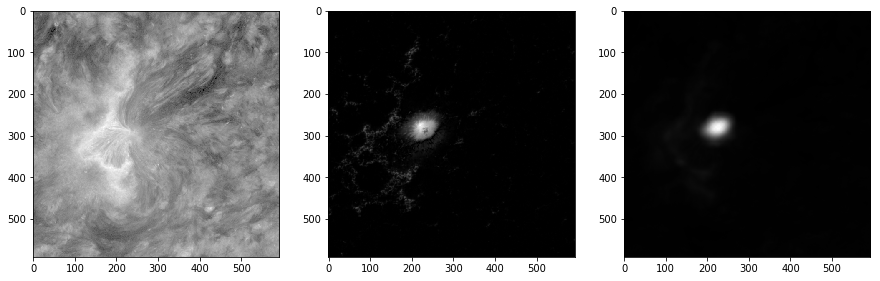

In [136]:
t = np.array(Image.open(target_list[best_ssim]))
p = np.array(Image.open(prediction_list[best_ssim]))
s = np.array(Image.open(signal_list[best_ssim]))
plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.imshow(s, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(t, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(p, cmap='gray')
plt.savefig('fig4.png')

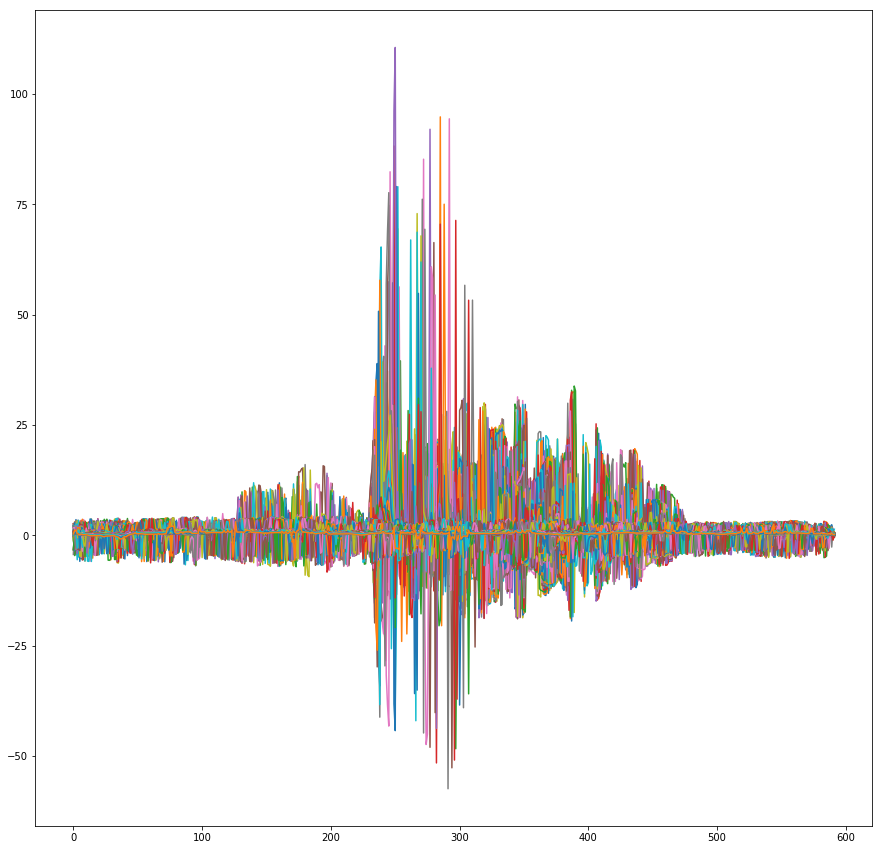

In [114]:
#this isn't like useful or anything but it turned out very pretty so I'm saving it
intensity = np.divide(p, t)
plt.figure(figsize=(15,15))
plt.plot(intensity)
plt.show()

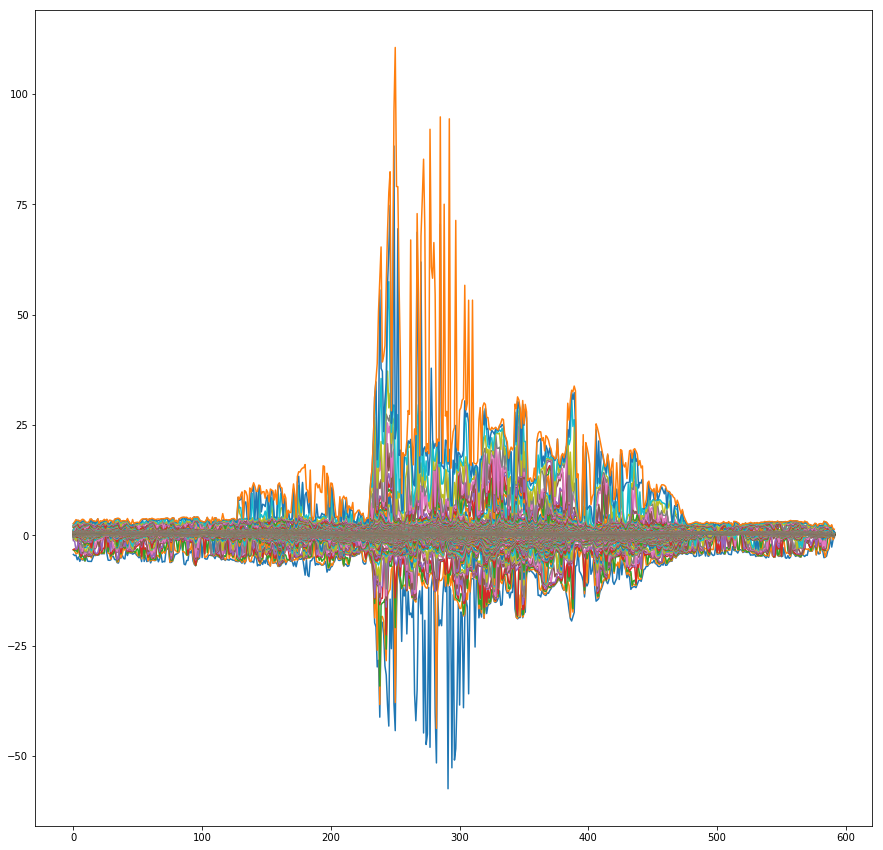

In [115]:
#this isn't like useful or anything but it's very pretty
intensity = np.divide(p, t)
intensity.sort()
plt.figure(figsize=(15,15))
plt.plot(intensity)
plt.show()

(-2, 2)

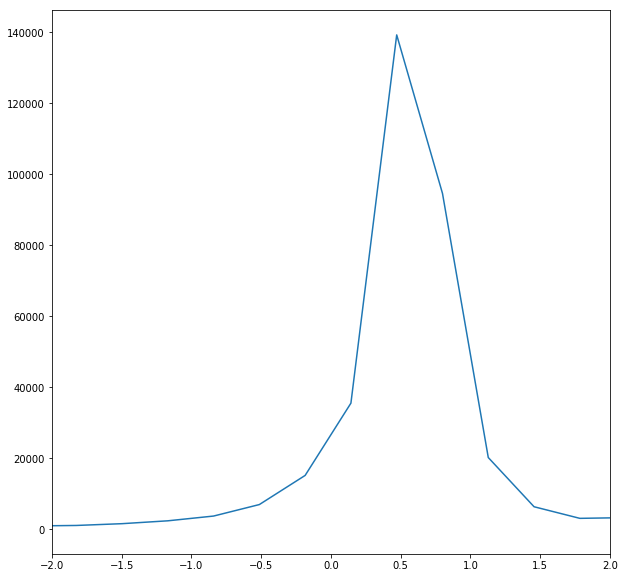

In [131]:
import skimage.exposure as e
intensity = np.divide(p, t)
y, x =e.histogram(intensity, nbins = 512)

plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.xlim((-2, 2))


#plt.figure(figsize=(10,10))
#onerow = intensity[0, :]
#onerow.sort()
#plt.plot(onerow)
#plt.show()

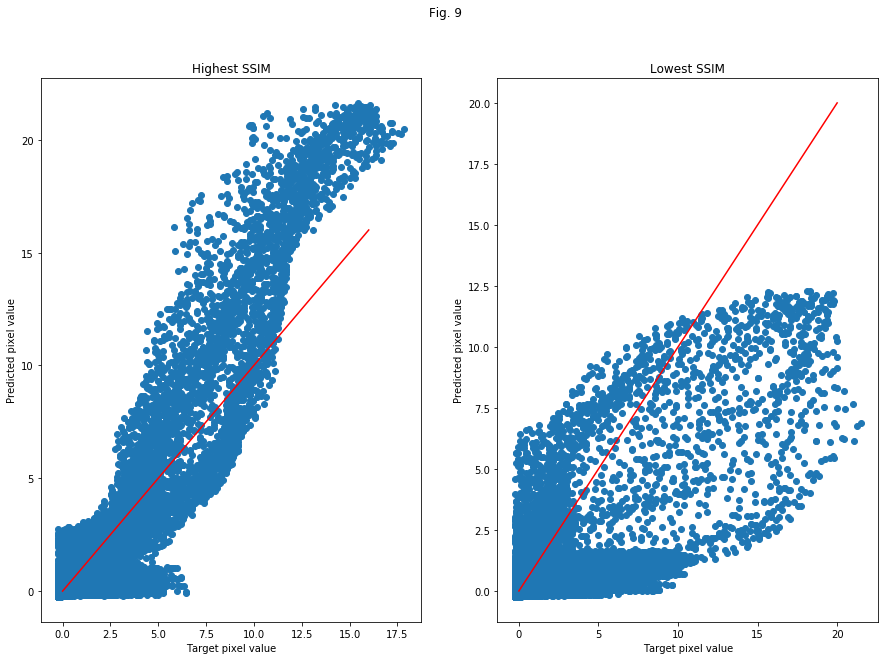

In [210]:
import skimage.exposure as e

plt.figure(figsize=(15,10))

t = np.array(Image.open(target_list[best_ssim]))
p = np.array(Image.open(prediction_list[best_ssim]))

p_flat = np.ndarray.flatten(p)
t_flat = np.ndarray.flatten(t)
order=np.argsort(t_flat)
t_flat.sort()

plt.subplot(121)
plt.scatter(t_flat, p_flat[order])
plt.plot(range(t_flat.max()), range(t_flat.max()), 'r')
plt.title('Highest SSIM')
plt.xlabel('Target pixel value')
plt.ylabel('Predicted pixel value')

t = np.array(Image.open(target_list[worst_ssim]))
p = np.array(Image.open(prediction_list[worst_ssim]))
p_flat = np.ndarray.flatten(p)
t_flat = np.ndarray.flatten(t)

order=np.argsort(t_flat)
t_flat.sort()
#plt.figure(figsize=(10,10))
plt.subplot(122)
plt.scatter(t_flat, p_flat[order])
plt.plot(range(t_flat.max()), range(t_flat.max()), 'r')
plt.title('Lowest SSIM')
plt.xlabel('Target pixel value')
plt.ylabel('Predicted pixel value')

plt.suptitle('Fig. 9')
plt.savefig('fig9.png')
plt.show()


In [ ]:
t = np.array(Image.open(target_list[best_mse]))
p = np.array(Image.open(prediction_list[best_mse]))
p_flat = np.ndarray.flatten(p)
t_flat = np.ndarray.flatten(t)

order=np.argsort(t_flat)
t_flat.sort()

plt.subplot(223)
plt.scatter(t_flat, p_flat[order])
plt.plot(range(t_flat.max()), range(t_flat.max()), 'r')

t = np.array(Image.open(target_list[worst_mse]))
p = np.array(Image.open(prediction_list[worst_mse]))
p_flat = np.ndarray.flatten(p)
t_flat = np.ndarray.flatten(t)

order=np.argsort(t_flat)
t_flat.sort()

plt.subplot(224)
plt.scatter(t_flat, p_flat[order])
plt.plot(range(t_flat.max()), range(t_flat.max()), 'r')
plt.show()